# 01 - Feature Selection and Dimentionality Reduction
** Ecole Centrale Nantes **

** Diana Mateus **



PARTICIPANTS: Yueying CAO

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 1. Feature Selection


### 1.1 Linear Regression

**a) Run the code to create a toy dataset**. The dataset has 100 points each described by three features $x_1$, $x_2$ and $x_3$. The target value $y$ is continuous and is linearly generated from the three variables (and noise). Notice how the three variables are created.

**b)** **Training a linear regression model** Use the scikit learn in-built functions for fiting a linear model to the created dataset 

``model = LinearRegression()``

``model.fit(X,Y)``

The goal is to automatically estimate the parameters $w_1$, $w_2$ and $w_3$ of the linear model from the input datamatrix $\mathbb{X}$ and the target values ${y}$. 

Look at the documentation of the ``LinearRegression`` function to recover the estimated values of the intercept  (ordonnée à l'origine) $b$ and coefficient $w_1$, $w_2$, $w_3$ parameters.

Compare the results with the Ordinary Least Squares analytical solution to recover the model parameters. Hint: ```np.linalg.inv```

**c)** **Evaluating the target predictions** 
Use the ``model.predict`` function to estimate the predictions $y_{hat}$ for the training dataset $X$.

- Plot $y$ vs. $y_{hat}$
- Compute the mean squared error and the r2 variance error between the estimated and the ground truth outputs. 
- Describe your findings

**d)** **Comparing the ground truth vs the estimated model parameters** 
- Compare the values of the original parameters to the estimated ones. Are the estimated values for the coefficients $w_1$, $w_2$, $w_3$ and the intercept $b$ close to the original model?
- What can you say about the contribution of each input feature to the output?
- Explain why do the recovered coefficients may be different to the ones used to generate the data ? Hint: the reason is not the added noise.
- How can we improve the interpretability of the weights? at what cost?

In [3]:
#a) Create dataset 
from sklearn.linear_model import LinearRegression

size = 100
np.random.seed(seed=5)
 
X_seed = np.random.normal(0, 1, size) 
X1 = X_seed + np.random.normal(0, .1, size)
X2 = X_seed + np.random.normal(0, .01, size)
X3 = X_seed + np.random.normal(0, .001, size)
X = np.array([X1, X2, X3]).T

intercept = 10+np.random.normal(0,1, size).reshape((size,1))
W = np.ones((3,1))
Y = np.matmul(X,W)+ intercept

print('Shape of X',np.shape(X))
print('Shape of W', np.shape(W))
print('Shape of Y', np.shape(Y))



Shape of X (100, 3)
Shape of W (3, 1)
Shape of Y (100, 1)


In [4]:
#b) Fitting a Linear Regression Model
model_LR = LinearRegression()        # consider the intercept by default
model_LR.fit(X,Y)
w = model_LR.coef_           # get the coefficients of the model
b = model_LR.intercept_      # get the intercept of this model
print('By using Linear Regression Model, the coefficients are:',w[0], 'and the intercept weight is:',b)

# the Ordinary Least Squares analytical solution
X_LS = np.concatenate((X, np.ones((100,1))),axis=1)                # Consider the intercept for variable X by adding a vector
coeff_LS = np.linalg.inv(X_LS.T.dot(X_LS)).dot(X_LS.T).dot(Y)
print('By using Ordinary Least Squares solution, the coefficients are :',coeff_LS.T[0] )

By using Linear Regression Model, the coefficients are: [-1.23939725  7.13540719 -2.8473017 ] and the intercept weight is: [9.96724612]
By using Ordinary Least Squares solution, the coefficients are : [-1.23939725  7.13540719 -2.8473017   9.96724612]


Mean squared error: 0.86
Variance score: 0.89


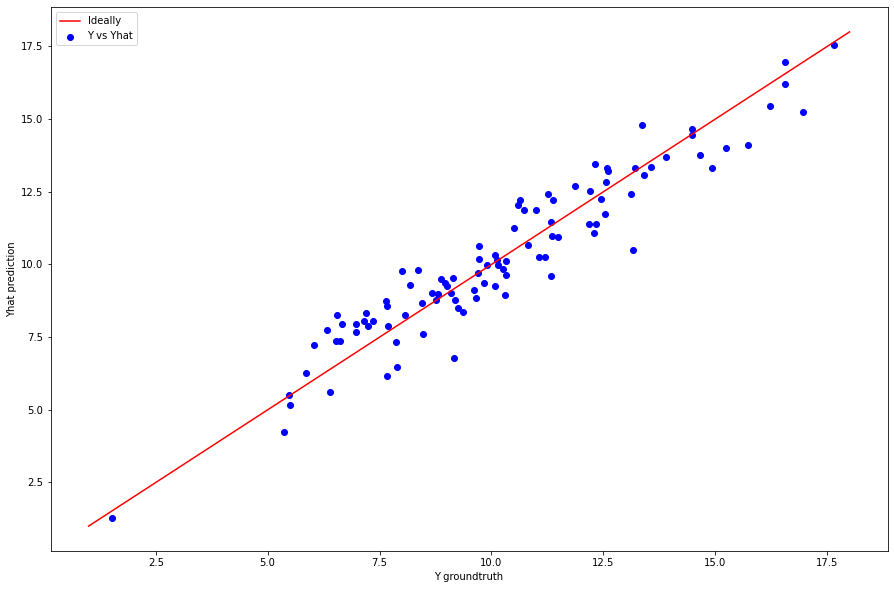

In [5]:
#c) Plot y against y*
from sklearn.metrics import mean_squared_error, r2_score

width=15
height=10
plt.rcParams['figure.figsize']=[width, height]

Yhat = model_LR.predict(X)

plt.figure()
plt.scatter(Y,Yhat,color = 'b')
plt.plot([1,18],[1,18],'r')
plt.xlabel('Y groundtruth')
plt.ylabel('Yhat prediction')
plt.legend(loc='best',labels=['Ideally','Y vs Yhat'])

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Yhat, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Yhat, Y))

### 1.2 Ridge and Lasso Regression

a) Using the data from above repeat the regression but fitting this time:
- a ridge model ```Ridge()```
- a Lasso model ```Lasso()```
- an Elastic Net model ```ElasticNet()```

b) Compare the **prediction errors** (MSE, r2), among the three regularized models.  Use a fixed value of the regularization coefficient ```alpha=0.3``` (alpha corresponds to $\lambda$ in the lectures). Comment on the results.

c) Plot the estimated coefficients against different values of ``alpha``($\lambda$). Use the following values 
``` python
alphas = np.logspace(-6, 2, 200)
```
d) **Coefficient estimate error** Mesure the MSE error between the original and estimated parameters for each case. Plot the coefficient error vs alpha.

e) **Prediction error** Mesure the MSE error between the ground truth and predicted target for each case. Plot the target error vs alpha.

f) Conclude.

In [6]:
#a) Ridge Lasso ElasticNet
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# the Ridge model
model_ridge = Ridge(alpha = 0.3)
model_ridge.fit(X,Y)
coef_ridge = model_ridge.coef_
interc_ridge = model_ridge.intercept_
Yhat_ridge = model_ridge.predict(X)
print('Use Ridge model:the coefficients are',coef_ridge[0],' and intercept is', interc_ridge)

# the Lasso model
model_lasso = Lasso(alpha = 0.3)
model_lasso.fit(X,Y)
coef_lasso = model_lasso.coef_
interc_lasso = model_lasso.intercept_
Yhat_lasso = model_lasso.predict(X)
print('\nUse Lasso model:the coefficients are',coef_lasso,' and intercept is', interc_lasso)

# the Elastic Net model
model_enet = ElasticNet(alpha = 0.3)
model_enet.fit(X,Y)
coef_enet = model_enet.coef_
interc_enet = model_enet.intercept_
Yhat_enet = model_enet.predict(X)
print('\nUse Elastic Net model:the coefficients are',coef_enet,' and intercept is', interc_enet)


Use Ridge model:the coefficients are [-0.56094744  1.86427034  1.72880423]  and intercept is [9.96004908]

Use Lasso model:the coefficients are [0.         2.68388391 0.        ]  and intercept is [9.99161432]

Use Elastic Net model:the coefficients are [0.81805466 0.93359842 0.93126214]  and intercept is [9.98727891]


In [7]:
#b) Errors

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Yhat, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(Yhat, Y))

# The mean squared error
print("Mean squared error ridge: %.2f"% mean_squared_error(Yhat_ridge, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score ridge: %.2f\n' % r2_score(Yhat_ridge, Y))

# The mean squared error
print("Mean squared error lasso: %.2f"% mean_squared_error(Yhat_lasso, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score lasso: %.2f\n' % r2_score(Yhat_lasso, Y))

# The mean squared error
print("Mean squared error enet: %.2f"% mean_squared_error(Yhat_enet, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score enet: %.2f\n' % r2_score(Yhat_enet, Y))

Mean squared error: 0.86
Variance score: 0.89

Mean squared error ridge: 0.87
Variance score ridge: 0.89

Mean squared error lasso: 0.98
Variance score lasso: 0.84

Mean squared error enet: 1.00
Variance score enet: 0.84



Text(0.5, 1.0, 'target error vs alpha')

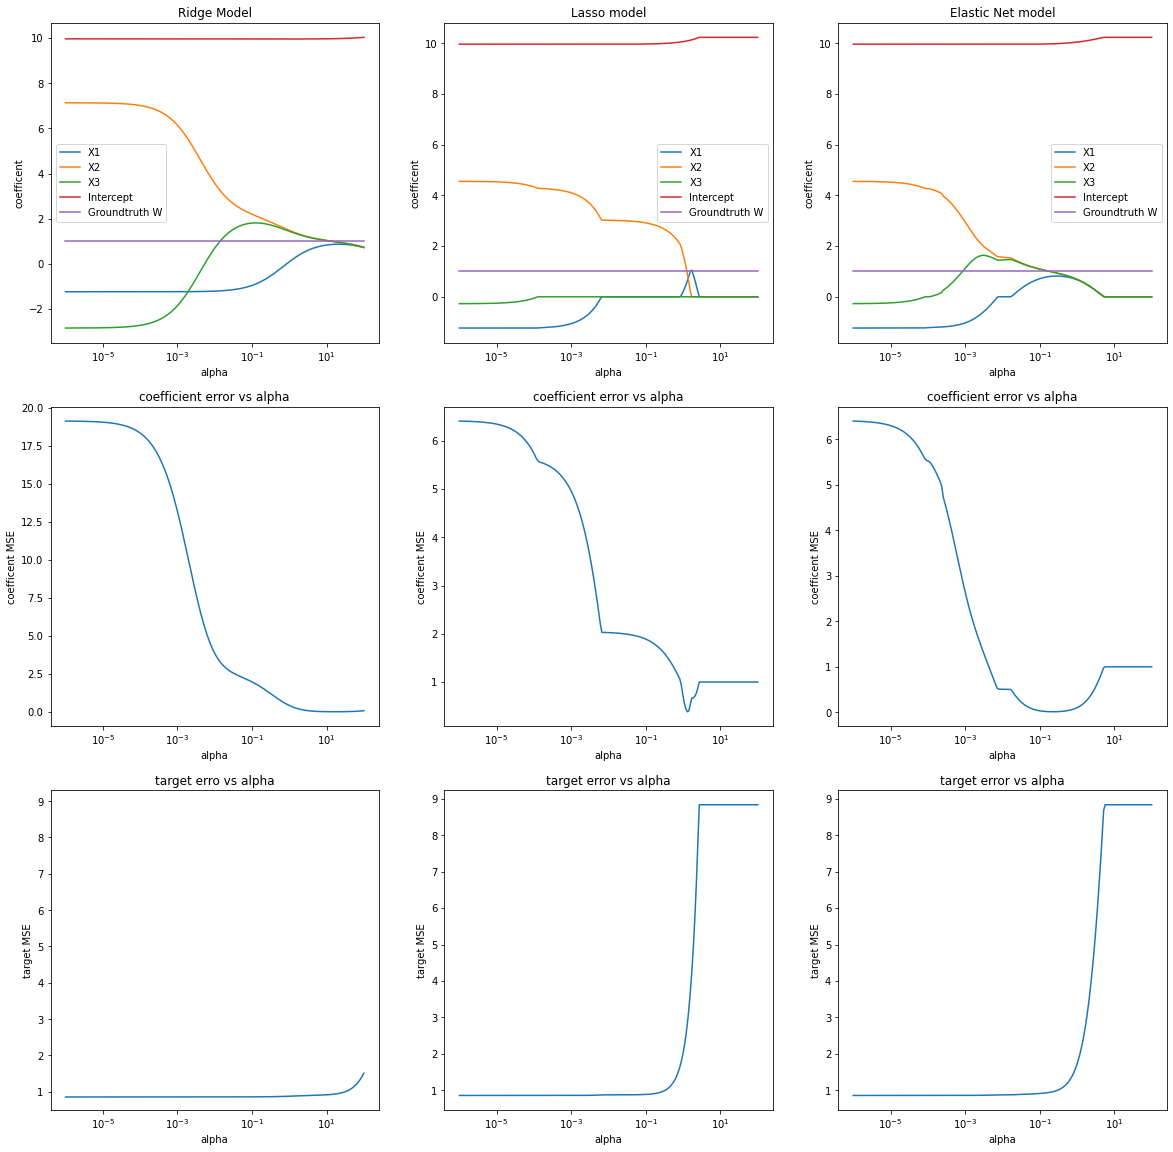

In [8]:
#c-d-e)Plot the estimated coefficients and errors against different values of alpha

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

alphas = np.logspace(-6, 2, 200)
plt.figure(figsize=(20,20))

# Ridge
Coef_ridge = np.zeros((len(alphas),3))
Interc_ridge = np.zeros(len(alphas)) 
YhatMSE_ridge = np.zeros(len(alphas))
CoefMSE_ridge = np.zeros(len(alphas))


for i in range(len(alphas)):
    model_ridge = Ridge(alpha = alphas[i])
    model_ridge.fit(X,Y)
    coef_ridge = model_ridge.coef_
    Coef_ridge[i,:] = coef_ridge
    Interc_ridge[i] = model_ridge.intercept_
    Yhat_ridge = model_ridge.predict(X)
    YhatMSE_ridge[i] = mean_squared_error(Yhat_ridge, Y)
    CoefMSE_ridge[i] = mean_squared_error(coef_ridge[0], W)

plt.subplot(3,3,1)
plt.plot(alphas,Coef_ridge[:,0],label='X1')    
plt.plot(alphas,Coef_ridge[:,1],label='X2') 
plt.plot(alphas,Coef_ridge[:,2],label='X3') 
plt.plot(alphas,Interc_ridge,label='Intercept')
plt.plot([1e-6,1e2],[1,1], label='Groundtruth W')
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('coefficent')
plt.title('Ridge Model')
plt.legend()

plt.subplot(3,3,4)
plt.plot(alphas, CoefMSE_ridge)
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('coefficent MSE')
plt.title('coefficient error vs alpha')
    
plt.subplot(3,3,7)
plt.plot(alphas, YhatMSE_ridge)
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('target MSE')
plt.ylim([0.5,9.3])
plt.title('target erro vs alpha')

# Lasso
Coef_lasso=np.zeros((len(alphas),3))
Interc_lasso = np.zeros(len(alphas)) 
YhatMSE_lasso = np.zeros(len(alphas))
CoefMSE_lasso = np.zeros(len(alphas))

for i in range(len(alphas)):
    model_lasso = Lasso(alpha = alphas[i])
    model_lasso.fit(X,Y)
    coef_lasso = model_lasso.coef_
    Coef_lasso[i,:] = coef_lasso
    Interc_lasso[i] = model_lasso.intercept_
    Yhat_lasso = model_lasso.predict(X)
    YhatMSE_lasso[i] = mean_squared_error(Yhat_lasso, Y)
    CoefMSE_lasso[i] = mean_squared_error(coef_lasso, W)

plt.subplot(3,3,2)
plt.plot(alphas,Coef_lasso[:,0],label='X1')    
plt.plot(alphas,Coef_lasso[:,1],label='X2') 
plt.plot(alphas,Coef_lasso[:,2],label='X3') 
plt.plot(alphas,Interc_lasso,label='Intercept')
plt.plot([1e-6,1e2],[1,1], label='Groundtruth W')
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('coefficent')
plt.title('Lasso model')
plt.legend()

plt.subplot(3,3,5)
plt.plot(alphas, CoefMSE_lasso)
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('coefficent MSE')
plt.title('coefficient error vs alpha')
    
plt.subplot(3,3,8)
plt.plot(alphas, YhatMSE_lasso)
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('target MSE')
plt.title('target error vs alpha')

# Elastic Net
Coef_enet=np.zeros((len(alphas),3))
Interc_enet = np.zeros(len(alphas)) 
YhatMSE_enet = np.zeros(len(alphas))
CoefMSE_enet = np.zeros(len(alphas))

for i in range(len(alphas)):
    model_enet = ElasticNet(alpha = alphas[i])
    model_enet.fit(X,Y)
    coef_enet = model_enet.coef_
    Coef_enet[i,:] = coef_enet
    Interc_enet[i] = model_enet.intercept_
    Yhat_enet = model_enet.predict(X)
    YhatMSE_enet[i] = mean_squared_error(Yhat_enet, Y)
    CoefMSE_enet[i] = mean_squared_error(coef_enet, W)

plt.subplot(3,3,3)
plt.plot(alphas,Coef_enet[:,0],label='X1')    
plt.plot(alphas,Coef_enet[:,1],label='X2') 
plt.plot(alphas,Coef_enet[:,2],label='X3') 
plt.plot(alphas,Interc_enet,label='Intercept')
plt.plot([1e-6,1e2],[1,1], label='Groundtruth W')
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('coefficent')
plt.title('Elastic Net model')
plt.legend()

plt.subplot(3,3,6)
plt.plot(alphas, CoefMSE_enet)
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('coefficent MSE')
plt.title('coefficient error vs alpha')
    
plt.subplot(3,3,9)
plt.plot(alphas, YhatMSE_enet)
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('target MSE')
plt.title('target error vs alpha')


### 1.3 Feature selection  for Heart Disease
The dataset ```filtHeartDataSet``` is a filtered version and subset of Heart dataset which contains a binary outcome labels for 299 patients  with chest pain. 
- A positive target value indicates the presence of heart disease based on an angiographic test, 
- while a negative target value means no heart disease. 

The data matrix dataMatrix contains 13 features (measurements) including Age, Sex, Chol (a cholesterol measurement), and other heart and lung function measurements.

See the following link for the full description
http://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Goal**: Find and retain only the most relevant features to predict heart disease

**a)** Run the given code to load and prepare the Heart Disease dataset.

**b)** Compute the correlation of the target to every value and between variables **Hint** use ``np.corrcoef`` on the matrix containing both the target values and the variables.

**c)** Run the skitlearn example for univariate feature selection with  as criteria.

**d)** Modify the example to do feature selection on the Heart Disease dataset. Try the ``f-test`` and ``mutual information`` univariate tests for classification. 

**e)** Compare the results of d) against those of Lasso and Elastic Net regression.

**f)**  What are the most predictive variables to be preserved? Recover the actual name of the variables in each case.How many variables should we keep?

**g)** What type of variable selection methods are the univariate test and Lasso and Elastic Net? Which type of method is missing?

In [9]:
#a) Load and prepare data
#The variables of interest are Xall and yall
#The final ordered list of variable names is found in new_columns_2

import pandas as pd
# Create Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df0     = pd.read_table("heart_disease_all14.csv", sep=',', header=None, names=columns)
# Convert categorical variables with more than two values into dummy variables.
# Note that variable ca is discrete but not categorical, so we don't convert it.
df      = df0.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df      = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df      = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df      = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df      = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df      = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df      = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

# Replace response variable values and rename
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"num":"hd"})

# New list of column labels after the above operations
new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print ('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.hd==1].index),len(df[df.hd==0].index)))

#print (df.head()) # UNCOMMENT FOR MORE INFO ON THE DATASET
#print (df.describe())# UNCOMMENT FOR MORE INFO ON THE DATASET

# Standardize the dataframe
stdcols = ["age","restbp","chol","thalach","oldpeak"]
nrmcols = ["ca"]
stddf   = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into numpy arrays to be used by classifiers
yall = stddf["hd"] # the heart disease column alone
Xall = stddf[new_columns_2[1:]].values # the potentially predictive variables
yXall = stddf.values # y and X combined in the same matrix, with y in the first column

print("Number of available features:", Xall.shape[1])
stddf[new_columns_2[1:]].head() #only the variables

print(new_columns_2)


Number of patients in dataframe: 299, with disease: 139, without disease: 160

Number of available features: 18
['hd', 'age', 'sex', 'restbp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'recg_1', 'recg_2', 'slope_1', 'slope_3', 'thal_6', 'thal_7']


<AxesSubplot:>

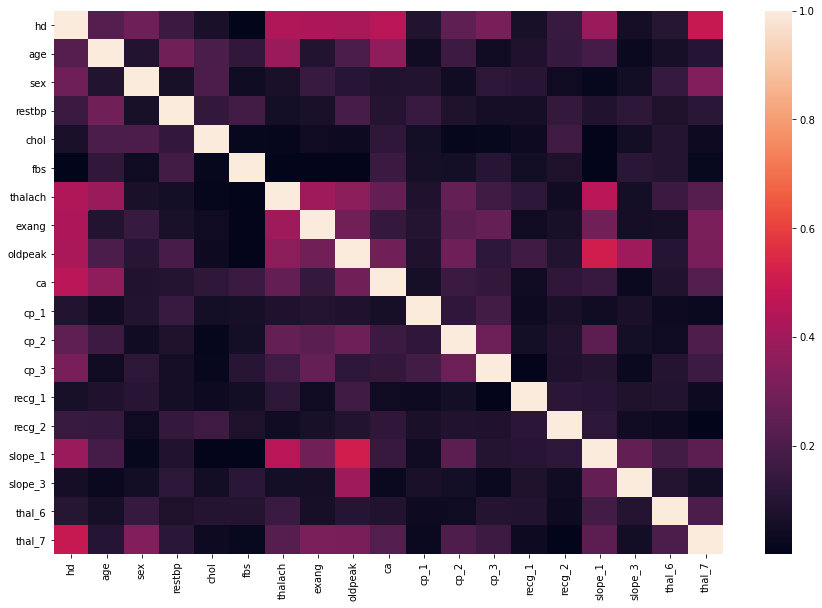

In [10]:
# b) Correlation matrix
import seaborn as sns
corrcoef = np.corrcoef(yXall.T)
sns.heatmap(data=abs(corrcoef),xticklabels=new_columns_2,yticklabels=new_columns_2)

In [11]:
# b)  Scikit learn example for monovariate feature selection on iris dataset

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

iris = load_iris()
Xiris, yiris = iris.data, iris.target
print('Shape of the input matrix', X.shape)

model = SelectKBest(f_classif, k=2)
model.fit(Xiris,yiris)
mask = model.get_support()
print('Selected best variables',mask)

Xiris_new=Xiris[:,mask==True]
print('Shape after variable selection',Xiris_new.shape)


Shape of the input matrix (100, 3)
Selected best variables [False False  True  True]
Shape after variable selection (150, 2)


In [12]:
# c) Run univariate feature selection on the heart disease dataset
new_features = new_columns_2[1:]

# only set K=1 in function SelectKBest function
# f_classif
print('By using f_classif:')
print('Shape of the input matrix', Xall.shape)
model_f = SelectKBest(f_classif, k=1)
model_f.fit(Xall,yall)
mask = model_f.get_support()
print('Selected best feature is: ', new_features[np.where(mask==True)[0][0]])

# mutual_classif
print('\nBy using mutual_info_classif:')
print('Shape of the input matrix', Xall.shape)
model_m = SelectKBest(mutual_info_classif, k=1)
model_m.fit(Xall,yall)
mask = model_m.get_support()
print('Selected best feature is:', new_features[np.where(mask==True)[0][0]])


By using f_classif:
Shape of the input matrix (299, 18)
Selected best feature is:  thal_7

By using mutual_info_classif:
Shape of the input matrix (299, 18)
Selected best feature is: thal_7


In [13]:
# c) univariate feature selection on the heart disease dataset

# try with different K values
## f_classif
print('By using f_classif:')
print('Shape of the input matrix', Xall.shape)
order_f = np.zeros(18)
for i in range(18):
    model_f = SelectKBest(f_classif, k=i+1)
    model_f.fit(Xall,yall)
    mask = model_f.get_support()
    for j in range(18):
        if mask[j]==True:
            order_f[j]=order_f[j]+1   # cumsum the selected features under different K
index = np.argsort(-order_f)      # sort the features to give the most relative one

f_classif = []
for i in range(18):
    In = index[i]
    f_classif.append(new_features[In])
print('Order of importance of the features obtained using f_classif: ', f_classif)

# mutual information
print('\nBy using mutual_info_classif:')
print('Shape of the input matrix', Xall.shape)
order_m = np.zeros(18)
for i in range(18):
    model_m = SelectKBest(mutual_info_classif, k=i+1)
    model_m.fit(Xall,yall)
    mask = model_m.get_support()
    for j in range(18):
        if mask[j]==True:
            order_m[j]=order_m[j]+1   # cumsum the selected features under different K
index = np.argsort(-order_m)      # sort the features to give the most relative one

mutual_classif = []
for i in range(18):
    In = index[i]
    mutual_classif.append(new_features[In])
print('Order of importance of the features obtained using mutual_info_classif: ', mutual_classif)


By using f_classif:
Shape of the input matrix (299, 18)
Order of importance of the features obtained using f_classif:  ['thal_7', 'ca', 'thalach', 'exang', 'oldpeak', 'slope_1', 'cp_3', 'sex', 'cp_2', 'age', 'restbp', 'recg_2', 'thal_6', 'cp_1', 'chol', 'recg_1', 'slope_3', 'fbs']

By using mutual_info_classif:
Shape of the input matrix (299, 18)
Order of importance of the features obtained using mutual_info_classif:  ['thal_7', 'ca', 'thalach', 'exang', 'oldpeak', 'chol', 'slope_1', 'cp_3', 'sex', 'recg_2', 'cp_2', 'slope_3', 'recg_1', 'fbs', 'thal_6', 'cp_1', 'age', 'restbp']


The order of importance of the feature with Lasso model:  ['ca', 'thal_7', 'cp_3', 'exang', 'sex', 'slope_1', 'thalach', 'cp_1', 'oldpeak', 'cp_2', 'recg_2', 'restbp', 'chol', 'fbs', 'thal_6', 'recg_1', 'slope_3', 'age']

The order of importance of the feature with Elastic Net model:  ['ca', 'thal_7', 'cp_3', 'cp_1', 'sex', 'exang', 'cp_2', 'slope_1', 'thalach', 'oldpeak', 'recg_2', 'restbp', 'fbs', 'chol', 'thal_6', 'recg_1', 'slope_3', 'age']


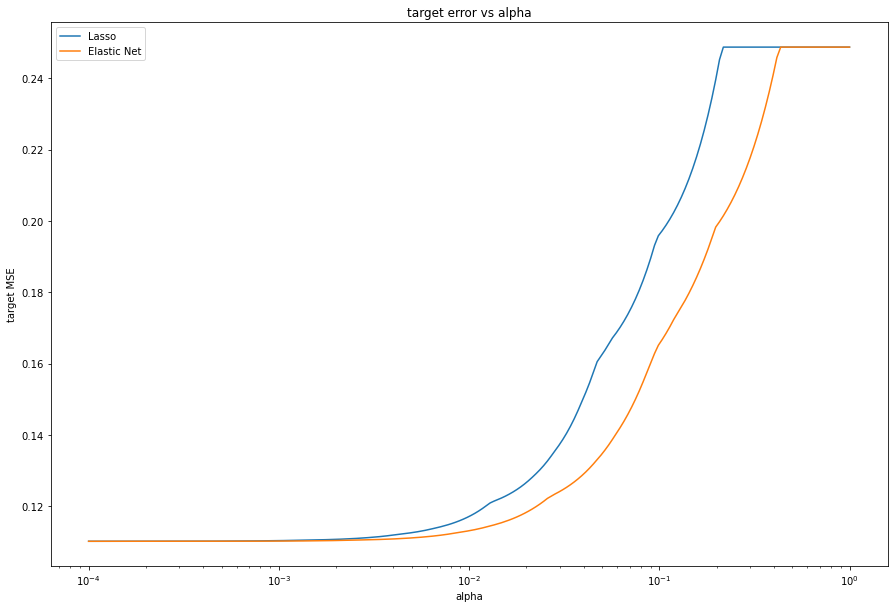

In [14]:
# d) Lasso and Ridge 
alphas1 = np.logspace(-4, 0, 200)

# plot the target error vs alpha to determine alpha
alphas = np.logspace(-4, 0, 200)
YhatMSE_lasso = np.zeros(len(alphas))
CoefMSE_lasso = np.zeros(len(alphas))
YhatMSE_enet = np.zeros(len(alphas))
CoefMSE_enet = np.zeros(len(alphas))

for i in range(len(alphas)):
    model_lasso = Lasso(alpha = alphas[i])
    model_lasso.fit(Xall,yall)
    Yhat_lasso = model_lasso.predict(Xall)
    YhatMSE_lasso[i] = mean_squared_error(Yhat_lasso, yall)
    
    model_enet = ElasticNet(alpha = alphas[i])
    model_enet.fit(Xall,yall)
    Yhat_enet = model_enet.predict(Xall)
    YhatMSE_enet[i] = mean_squared_error(Yhat_enet, yall)
    
plt.figure()
plt.plot(alphas, YhatMSE_lasso,label='Lasso')
plt.plot(alphas, YhatMSE_enet,label='Elastic Net')
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('target MSE')
plt.title('target error vs alpha')
plt.legend()


# from the figure we choose alpha=0.01 as the parameters in two models
# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(Xall,yall)
order_lasso = []

index = np.argsort(-abs(lasso.coef_))
for i in range(18):
    In = index[i]
    order_lasso.append(new_features[In])
print('The order of importance of the feature with Lasso model: ', order_lasso)

# Elastic Net
enet = ElasticNet(alpha=0.01)
enet.fit(Xall,yall)
order_enet = []

index = np.argsort(-abs(enet.coef_))
for i in range(18):
    In = index[i]
    order_enet.append(new_features[In])
print('\nThe order of importance of the feature with Elastic Net model: ', order_enet)

## 2. Principal Component Analysis

### 2.1. PCA demo with point cloud
Run and analyse the demo code

Explained variance [0.7625315 0.0184779]
PCA components
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


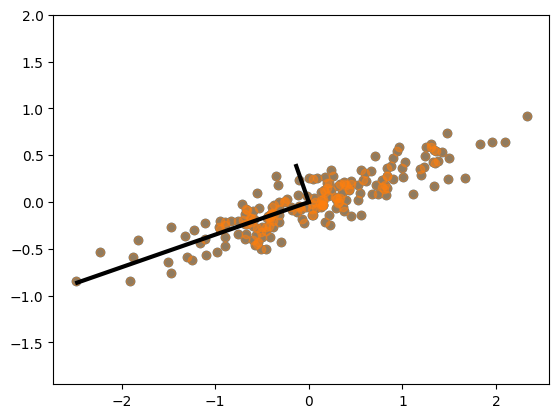

In [6]:
from sklearn.decomposition import PCA

#Generating the data
np.random.seed(1)
X = np.matmul(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

#Apply PCA
pca = PCA(n_components=2)
pca.fit(X)
print('Explained variance', pca.explained_variance_)
print('PCA components\n',pca.components_)

#Plot principal components
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');
plt.show()



### 2.2 Own PCA implementation 
Make your own implementation of the PCA algorithm and compare your results with the above

To implement PCA follow the steps bellow
- Demean the data (mean=0).
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix (Equivalently do Singular Vector Decomposition on the data Matrix). 
``` np.linalg.eig(cov_mat)```
- Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues. Remember k is the number of dimensions of the new feature subspace (k ≤ D) (Check first if already ordered)
- Construct the projection matrix T from the selected k eigenvectors.
- Transform the original dataset X via T to obtain a k dimensional feature subspace Z

Your results should be equivalent to the above, explain any difference.

Explained variance [0.75885294 0.01895801]
PCA components
 [[ 0.94458325  0.32827198]
 [-0.32827198  0.94458325]]


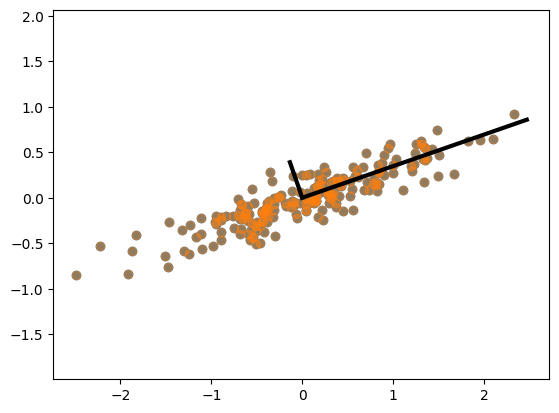

In [7]:
#Generating the data
np.random.seed(1)
X = np.matmul(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

# demean the data
x_mean = X - np.mean(X)
N, D = np.shape(X)
# Calcule the covariance matrix
cov_mat = np.matmul(x_mean.T,x_mean)/(N)
# Decomposition the covariance matrix
val,vec = np.linalg.eig(cov_mat) 
# Sort eigenvalues in descending order
sor_index = np.argsort(-val) 

k = 2
# check the standrd : k is the number of dimensions of the new feature subspace (k ≤ D) 
if k > D:  
    print ("k should lower than the number of dimensions of the orignal feature number")
else:
    # We choose the k eigenvectors to construct the projection matrix T  
    k_vec = vec[sor_index[0:k],:].T
    #Transform the original dataset x  
    x_PCA = np.dot(x_mean, k_vec) 

print('Explained variance',val)
print('PCA components\n',k_vec)

#Plot principal components
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(val, k_vec):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');
plt.show()

### 2.3 PCA on digits dataset

Apply PCA (yours or the in-built version) on the load_digits dataset

**a)** Visualize some of the images for each target value.

**b)** Apply PCA to reduce the dimensionality of each vectorized image (1,64) to just 2 dimensions. Plot the projected dataset with a scatter plot in two dimensions, using the labels to color. Comment.

Hint for plotting:
``` python
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', 
            alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();
```

**c)** Visualize the cumulative explained variance vs the the number of retained dimensions

**d)** For 3 different input images (from different target values) 
- recostruct and show the full 8x8 image from its 1x2 low-dimensional representation.
Hint: Use ```pca.inverse_transform```, 

- show how the aspect of the reconstructed image changes when increasing the number of retained dimensions.

**e)** what does the inverse_transformation function do?


Original size (1797, 64)


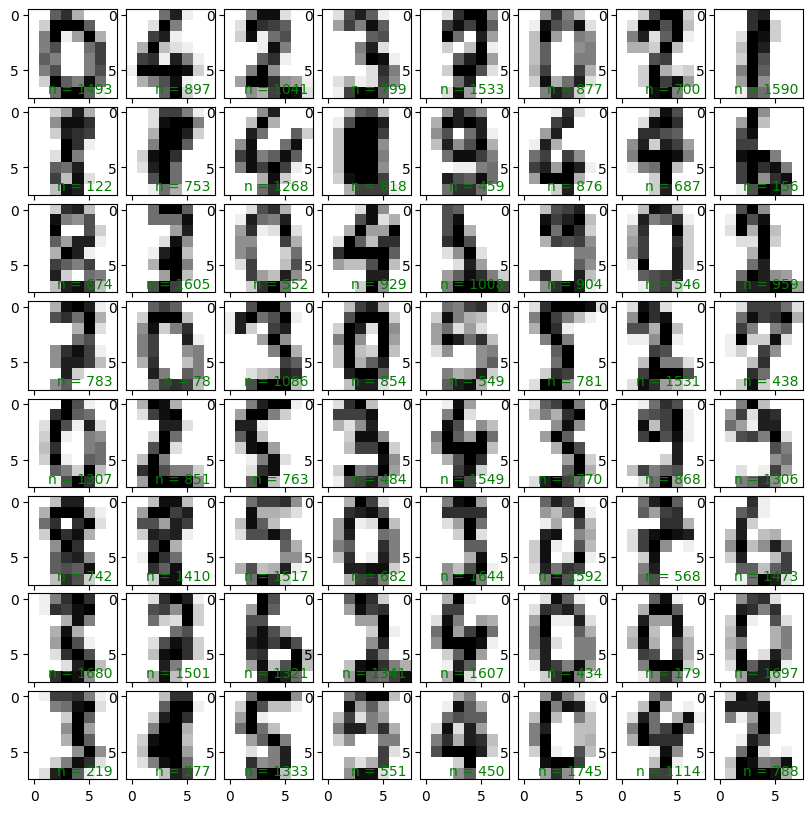

In [8]:
#a) Load and visualize data
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print('Original size',X.shape)

# a) Show some of the images
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    r = np.random.randint(1,X.shape[0])
    im = X[r,:]
    #print(im.shape)
    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(r), ha='right',
            transform=ax.transAxes, color='green')

plt.show()



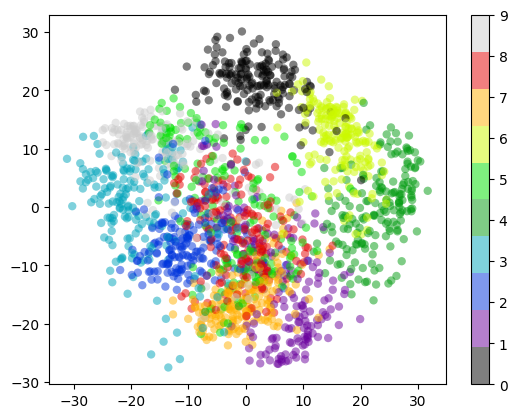

In [9]:
#b) 2D projection of the images

#Apply PCA
pca = PCA(n_components=2)
pca.fit(X)
#print('Explained variance', pca.explained_variance_)
#print('PCA components\n',pca.components_)

Xproj = pca.fit_transform(X) 
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', 
            alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();



Text(0, 0.5, 'cumulative explained variance')

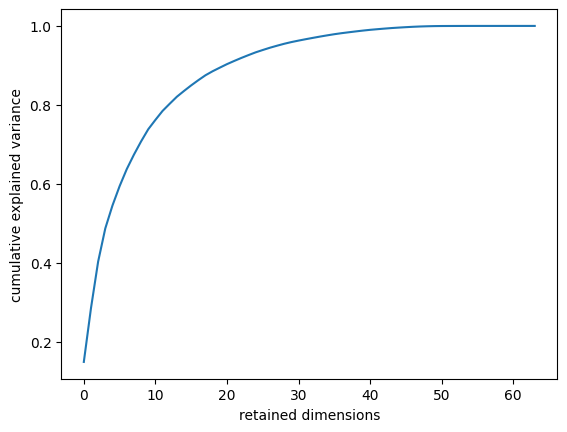

In [10]:
#c) Cummulative explained variance
pca = PCA()   
pca.fit(X)
var_exp = np.zeros(X.shape[1])

tot = sum(pca.explained_variance_)
var_exp = [(i/tot) for i in sorted(pca.explained_variance_, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.plot(cum_var_exp)
#dim = np.linspace(1,X.shape[1],X.shape[1])
#plt.scatter(dim,cum_var_exp)
plt.xlabel('retained dimensions')
plt.ylabel('cumulative explained variance')

# we use the pca fonction directly
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('retained dimensions')
#plt.ylabel('cumulative explained variance')

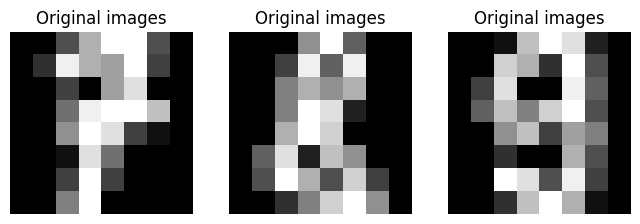

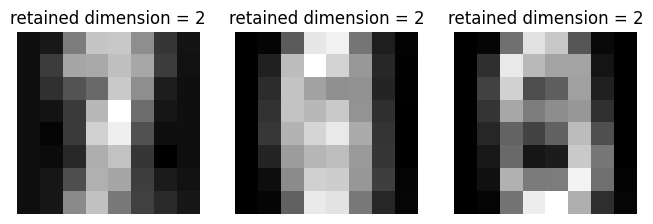

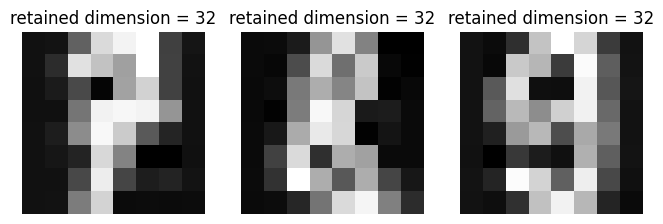

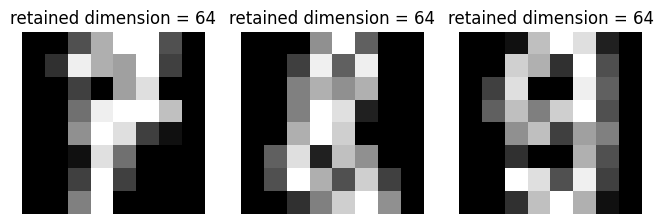

In [11]:
#d) Inverse transform for reconstruction (from low to high dimensional representation)

import random

plt.figure(figsize=(8,8))
r = random.randint(1,X.shape[0]) # To randomly select three consecutive images
for i in range(3): # i = 0,1,2   
    plt.subplot(1,3,i+1)
    plt.imshow(X[i+r,:].reshape(8, 8),cmap='gray')
    plt.axis('off')
    plt.title('Original images')
plt.show()

## for the situation that the retained demension = 2
pca2 = PCA(n_components=2)
pca2.fit(X)
Xproj2 = pca2.transform(X)
X_2 = pca2.inverse_transform(Xproj2)
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_2[i+r,:].reshape(8,8),cmap='gray')
    plt.axis('off')
    plt.title('retained dimension = 2')
plt.show()

## for the situation that the retained demension = 32
pca32= PCA(n_components=32)
pca32.fit(X)
Xproj32 = pca32.transform(X)
X_32 = pca32.inverse_transform(Xproj32)
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_32[i+r,:].reshape(8,8),cmap='gray')
    plt.axis('off')
    plt.title('retained dimension = 32')
plt.show()

## for the situation that the retained demension = 64
pca64= PCA(n_components=64)
pca64.fit(X)
Xproj64 = pca64.transform(X)
X_64 = pca64.inverse_transform(Xproj64)
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_64[i+r,:].reshape(8,8),cmap='gray')
    plt.axis('off')
    plt.title('retained dimension = 64')
plt.show()

# To see clearly how does the aspect of the reconstructed image changes 
# when increasing the number of retained dimensions, we choose all the retained dimensions.
#plt.figure(figsize=(8,8))
#for i in range(1, X.shape[1]+1):
#    pcaALL = PCA(n_components=i)
#    pcaALL.fit(X)
#    XprojALL = pcaALL.transform(X)
#    X_newALL = pcaALL.inverse_transform(XprojALL)
#    plt.subplot(8,8,i)
#    plt.imshow(X_newALL[1,:].reshape(8,8),cmap='gray')
#    plt.axis('off') 
#    plt.title(str(i))
#plt.show()

**BONUS** 

Try the PCA reduction on a faces dataset
* https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/


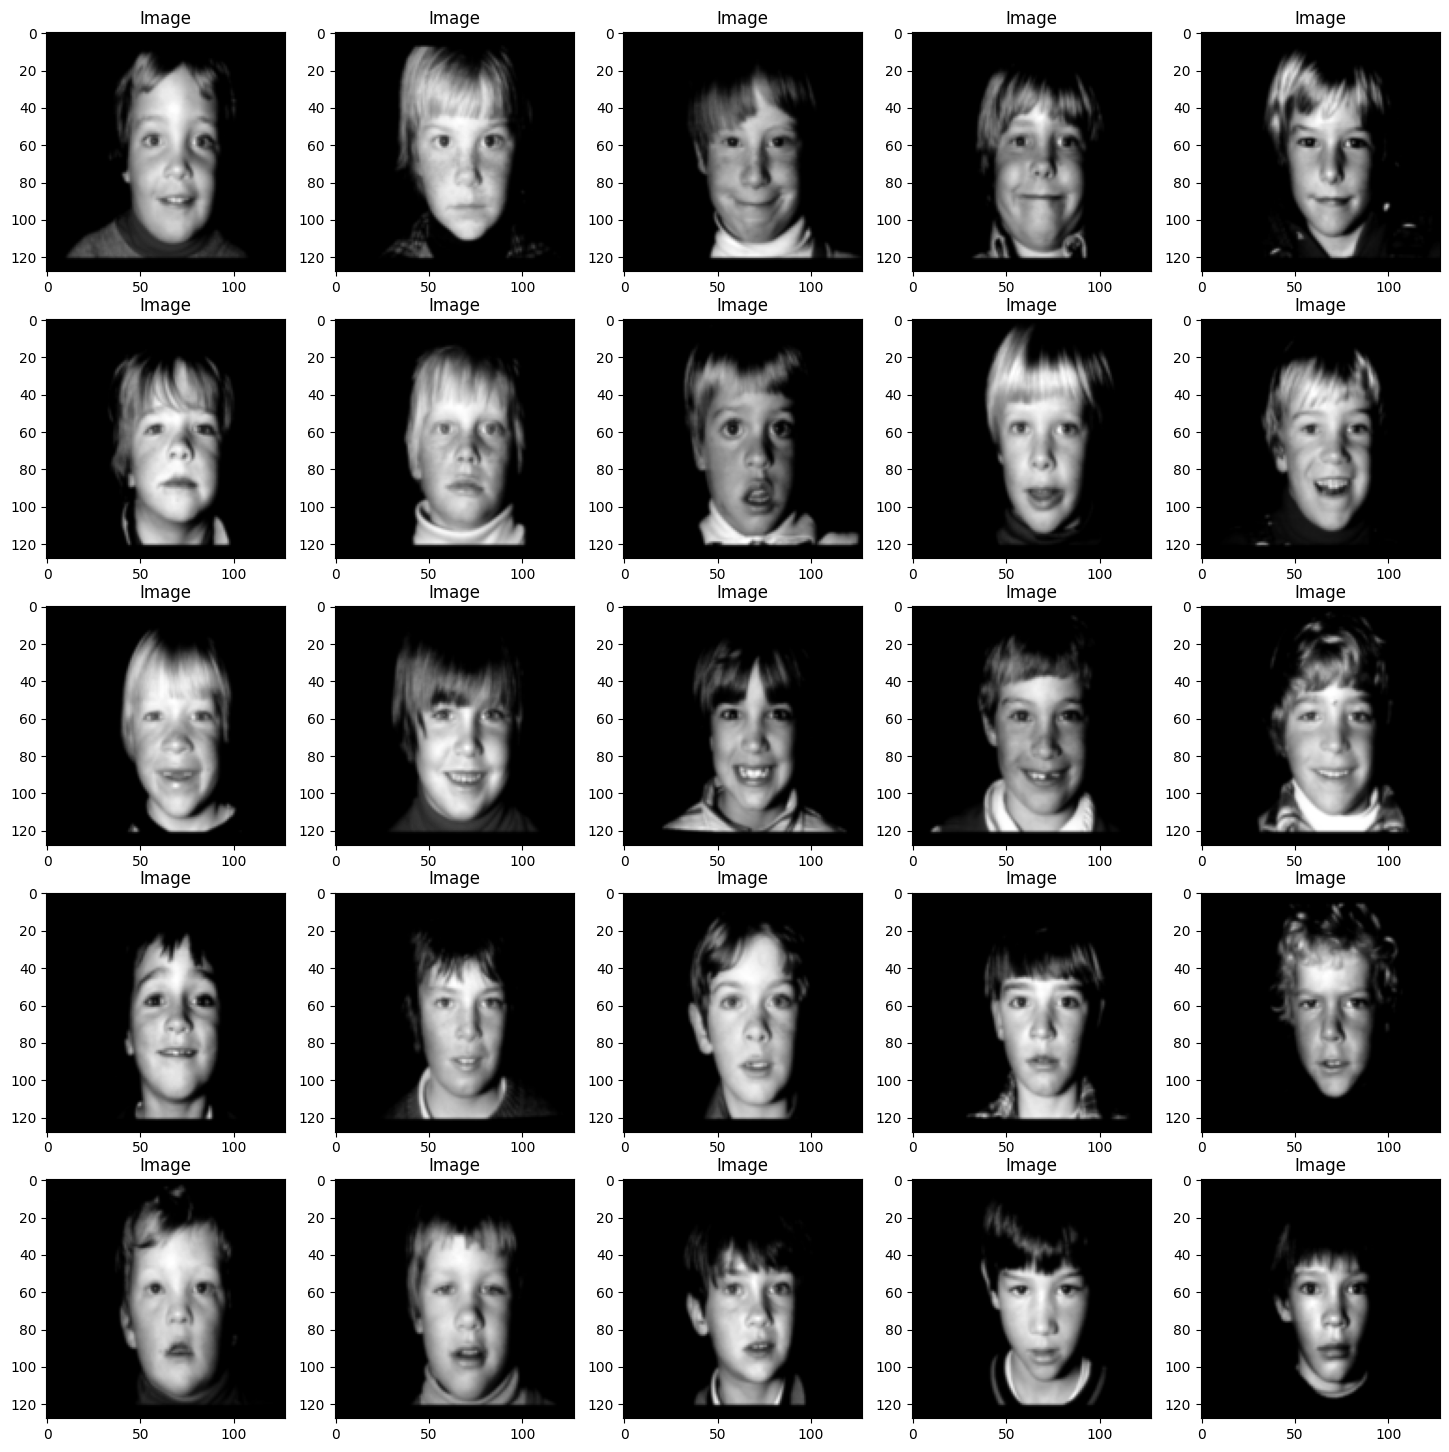

Text(0, 0.5, 'cumulative explained variance')

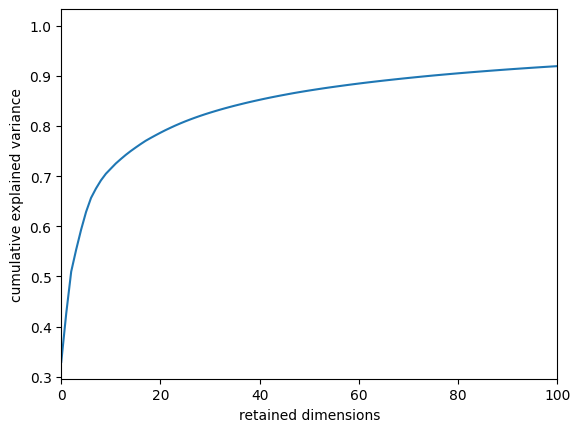

In [13]:
#Reading the data for the Bonus once downloaded from the website

import os
import skimage.io as io
from skimage.transform import resize, rescale
import sys
#import cv2
import numpy as np
import matplotlib.pyplot as plt

IMDIR = "./rawdata/"
SUBDIR = os.path.join(IMDIR, "rawdata")

imHeight = 128
imWidth = 128

numIms=1
for filename in os.listdir(SUBDIR):
    numIms = numIms + 1

X=np.zeros((numIms,imHeight*imWidth)) 

fig=plt.figure(figsize=(18, 18))
counter=1
for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        #print(f)
        fd = open(f, 'rb')
        f = np.fromfile(fd, dtype=np.uint8,count=imHeight*imWidth)
        im = f.reshape((imHeight, imWidth)) #notice row, column format
        fd.close()
        X[counter,:] = im.ravel()
        if counter < 26:
            plt.subplot(5,5,counter)        
            #plt.imshow(im, cmap = 'gray')
            plt.imshow(X[counter,:].reshape(imHeight,imWidth), cmap = 'gray')
            plt.title('Image')
        counter = counter+1
plt.show()



#Cummulative explained variance
#we choose party of X to quickly calculate

pca = PCA()   
pca.fit(X)
var_exp = np.zeros(X.shape[1])
tot = sum(pca.explained_variance_)
var_exp = [(i/tot) for i in sorted(pca.explained_variance_, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.plot(cum_var_exp)
plt.xlim(0,100)
plt.xlabel('retained dimensions')
plt.ylabel('cumulative explained variance')



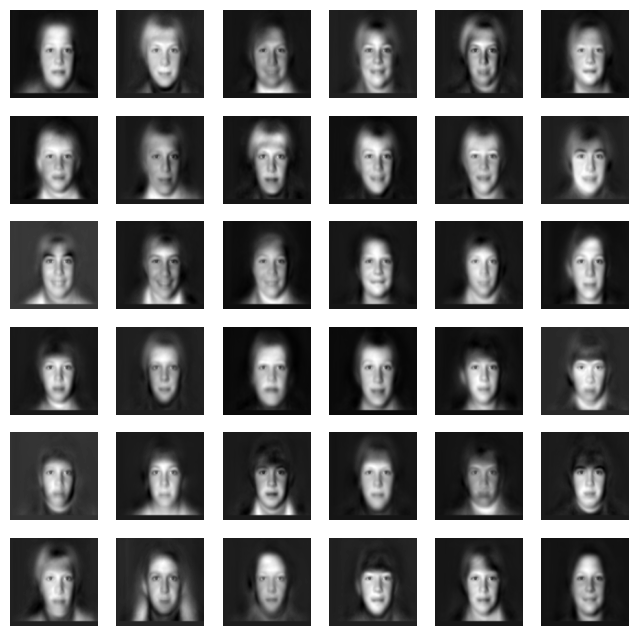

the commulative explained variance =  0.8503153449561204


In [16]:
# through the cummulative explained variance we choose k = 40 components
k = 40
pca = PCA(n_components=k)
pca.fit(X)
XProj = pca.transform(X)
x_pca = pca.inverse_transform(XProj)

#plot the reconstruction results
plt.figure(figsize=(8,8))
for i in range(1,37,1):
    plt.subplot(6,6,i)
    plt.imshow(x_pca[i,:].reshape(imHeight,imWidth),cmap='gray')
    plt.axis('off') 
plt.show()

v = np.sum(pca.explained_variance_ratio_)
print('the commulative explained variance = ',str(v))

Other faces datsets
* https://www.kaggle.com/lalitharajesh/face-recognition-eigenfaces
* https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html
* http://featureselection.asu.edu/index.php